In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Todos os dados

In [2]:
df = pd.read_csv('output/df.csv')

df.head()

,uf,semana,mes,no_entrevista,estrato,upa,respondente,status_domicilio,proj_populacao,condicao_no_domicilio,...,horas_semana_trabalho_realizadas,valor_dinheiro,contrato_trabalho_estava_suspenso,trabalho_no_mesmo_local,trabalho_remoto,auxilios_emergenciais_coronavirus,valor_recebido_auxilios_emergenciais,seguro_desemprego,valor_recebido_seguro_desemprego,solicitou_emprestimo
0,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,152677,Pessoa responsável pelo domicílio,...,48,1045,Não / Não aplicável,Sim,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
1,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,150642,Cônjuge ou companheiro(a) de sexo diferente,...,36,1045,Não / Não aplicável,Sim,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
2,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,...,0,0,Não / Não aplicável,Não / Não aplicável,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
3,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,...,0,0,Não / Não aplicável,Não / Não aplicável,Não / Não aplicável,Sim,1200.0,Não,0.0,Não solicitou
4,Rondônia,1,9,5,1110011,110015970,Pessoa moradora,Urbana,91889,Pessoa responsável pelo domicílio,...,0,0,Não / Não aplicável,Não / Não aplicável,Não / Não aplicável,Não,0.0,Não,0.0,Não solicitou


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149197 entries, 0 to 1149196
Data columns (total 83 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   uf                                                 1149197 non-null  object 
 1   semana                                             1149197 non-null  int64  
 2   mes                                                1149197 non-null  int64  
 3   no_entrevista                                      1149197 non-null  int64  
 4   estrato                                            1149197 non-null  int64  
 5   upa                                                1149197 non-null  int64  
 6   respondente                                        1149197 non-null  object 
 7   status_domicilio                                   1149197 non-null  object 
 8   proj_populacao                                     1149197 non

# População & Moradia

In [4]:
id_df = pd.read_csv('output/id_df.csv')

id_df.head()

,uf,semana,mes,no_entrevista,estrato,upa,respondente,status_domicilio,proj_populacao,condicao_no_domicilio,idade_morador,sexo,cor_raca
0,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,152677,Pessoa responsável pelo domicílio,36,masculino,Parda
1,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,150642,Cônjuge ou companheiro(a) de sexo diferente,30,feminino,Parda
2,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,13,masculino,Parda
3,Rondônia,4,9,5,1110011,110015970,Pessoa moradora,Urbana,145237,Filho(a) do responsável e do cônjuge,11,masculino,Parda
4,Rondônia,1,9,5,1110011,110015970,Pessoa moradora,Urbana,91889,Pessoa responsável pelo domicílio,57,feminino,Branca


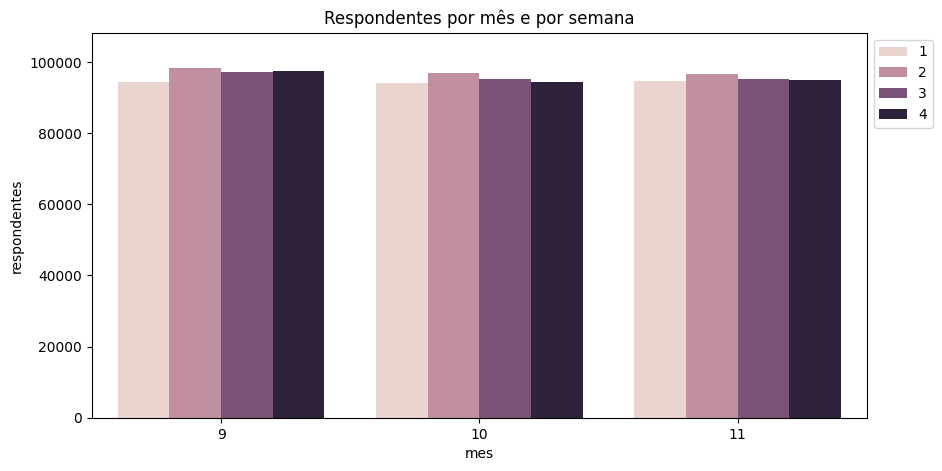

In [5]:
# respondente por mês e por semana
respondentes = id_df.groupby(['mes', 'semana']).size().reset_index(name='respondentes')

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=respondentes, x='mes', y='respondentes', hue='semana', ax=ax)
plt.title('Respondentes por mês e por semana')
plt.ylim(0, respondentes['respondentes'].max() * 1.1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [6]:
# print total de respondentes
print(f'Total de respondentes: {respondentes.respondentes.sum()}')

Total de respondentes: 1149197


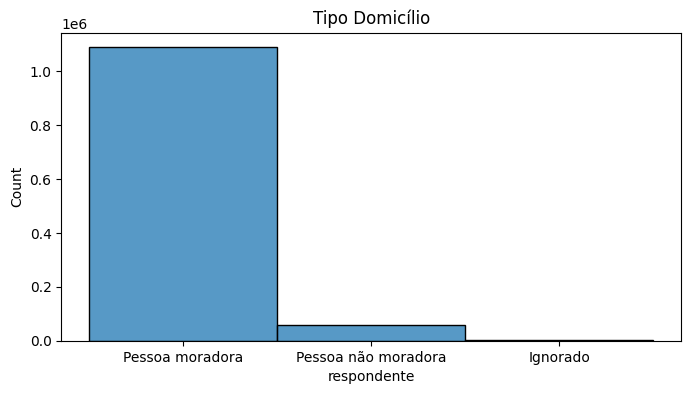

In [7]:
# histograma de respondente
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(id_df, x='respondente', kde=False, ax=ax)
plt.title('Tipo Domicílio')
plt.show()

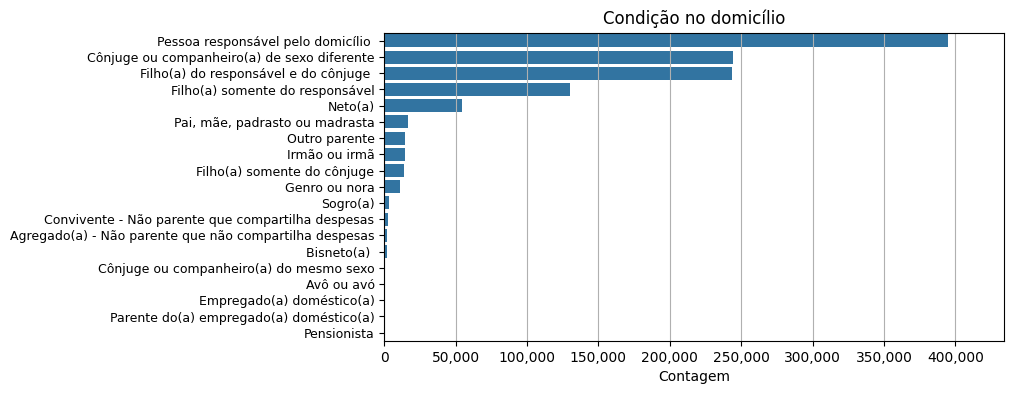

In [8]:
# count condição no domicílio
condicao_df = id_df.groupby('condicao_no_domicilio').size().reset_index(name='count')
# sort desc
condicao_df = condicao_df.sort_values(by='count', ascending=False)

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=condicao_df, x='count', y='condicao_no_domicilio', ax=ax, orient='h')
plt.title('Condição no domicílio')
plt.xlim(0, condicao_df['count'].max() * 1.1)
plt.yticks(fontsize=9)
plt.ylabel('')
plt.xlabel('Contagem')
ax.xaxis.grid(True)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

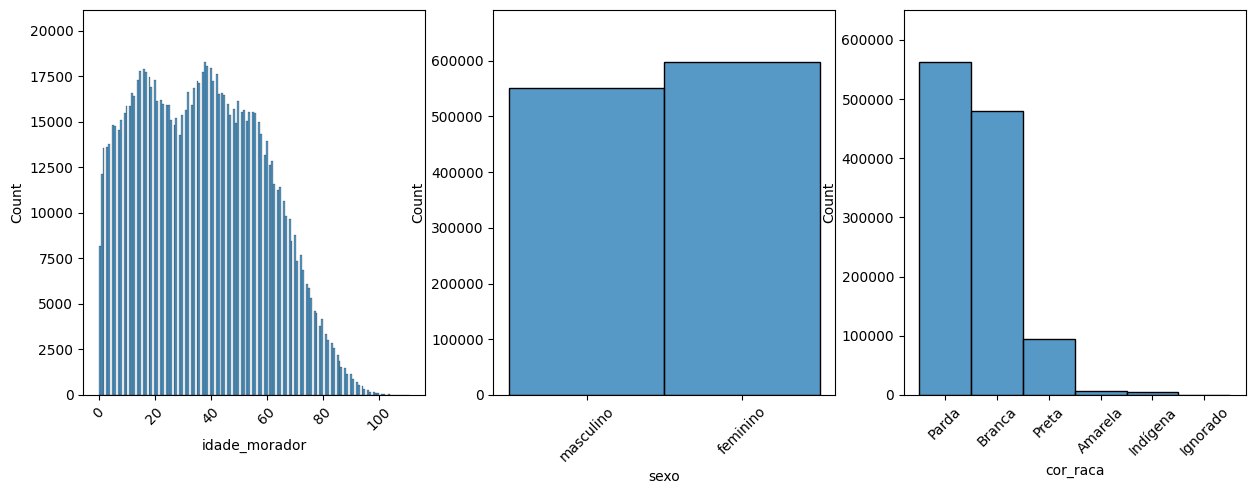

In [9]:
# idade, sexo e raça groups histogram
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(id_df, x='idade_morador', kde=False, ax=ax[0])
sns.histplot(id_df, x='sexo', kde=False, ax=ax[1])
sns.histplot(id_df, x='cor_raca', kde=False, ax=ax[2])
for ax_ in ax:
    ax_.tick_params(axis='x', rotation=45)
for ax_ in ax:
    ax_.set_ylim(0, ax_.get_ylim()[1] * 1.1)
plt.show()

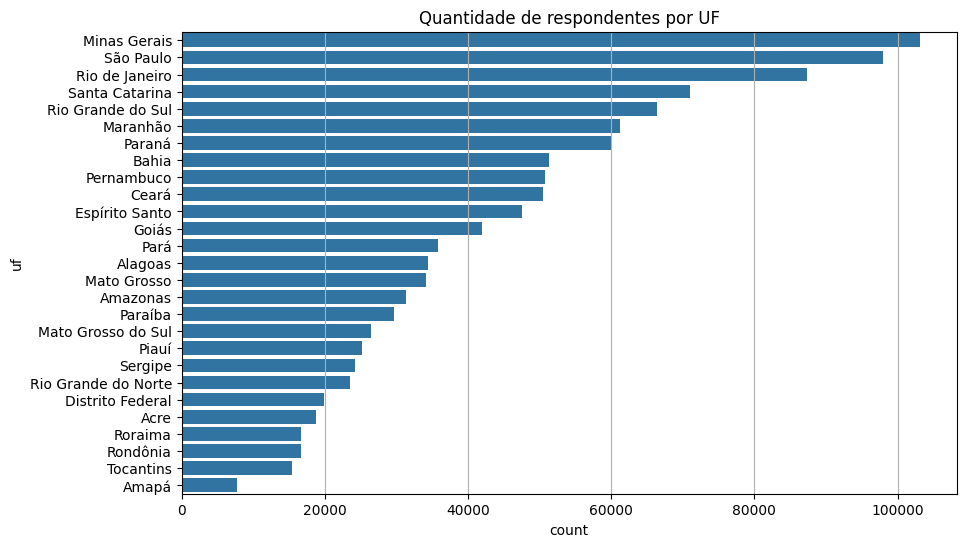

In [10]:
# group by uf, count and plot
uf_df = id_df.groupby('uf').size().reset_index(name='count')
uf_df = uf_df.sort_values(by='count', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=uf_df, x='count', y='uf', orient='h', ax=ax)
ax.set_title('Quantidade de respondentes por UF')
ax.grid(axis='x')
plt.show()

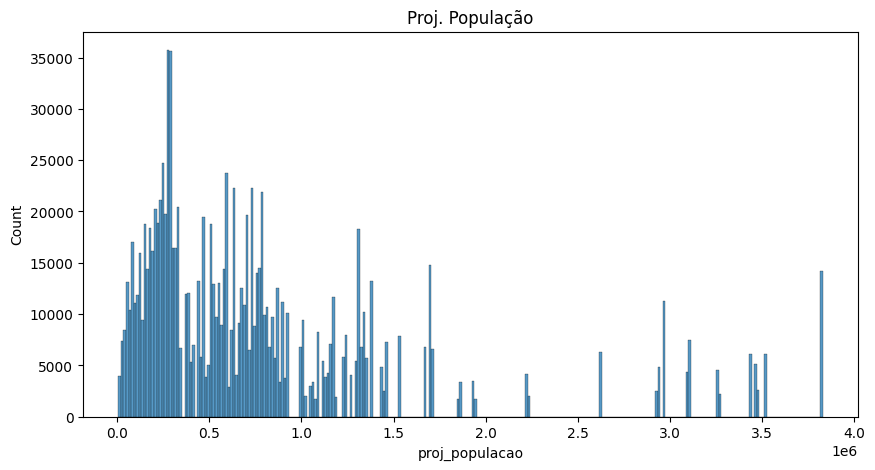

In [11]:
# histograma de proj_populacao
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(id_df, x='proj_populacao', kde=False, ax=ax)
plt.title('Proj. População')
plt.show()

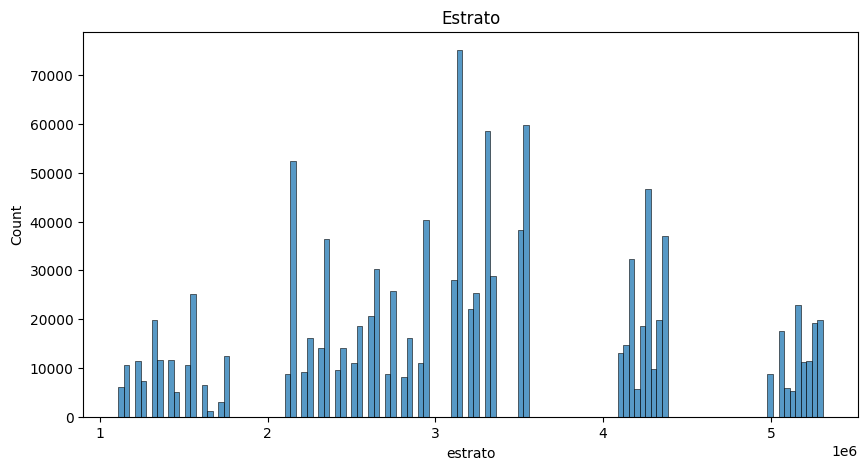

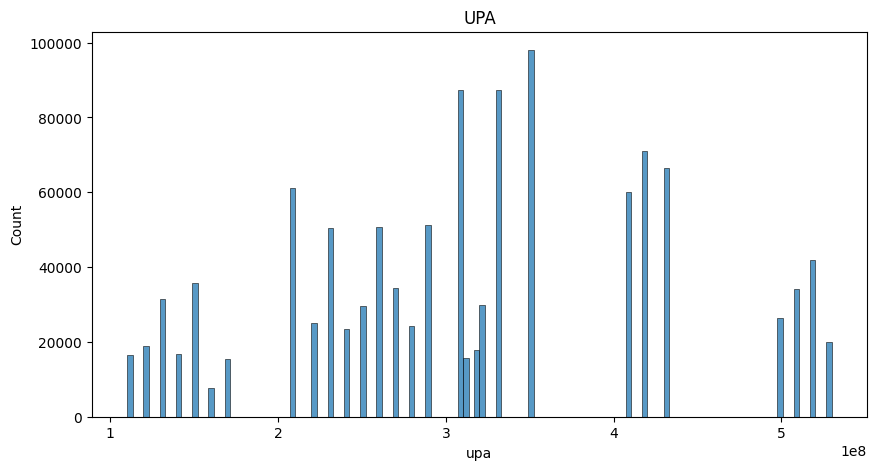

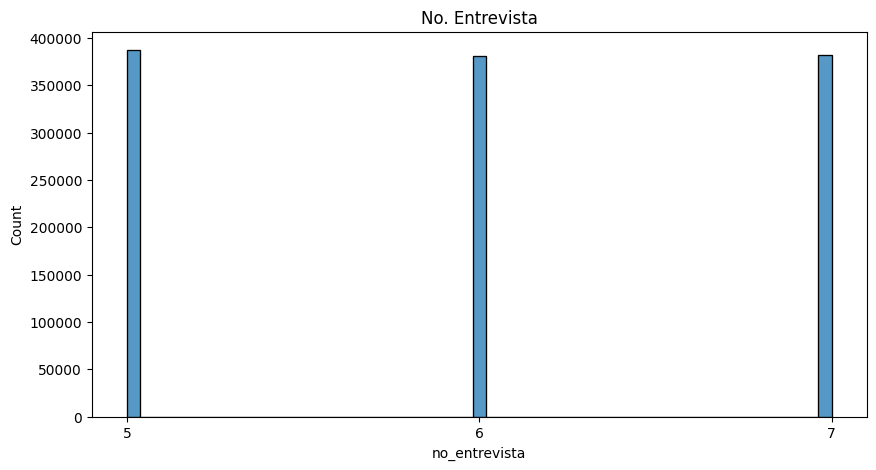

In [12]:
# histograma de estrato
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(id_df, x='estrato', kde=False, ax=ax)
plt.title('Estrato')
plt.show()

# histograma de upa
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(id_df, x='upa', kde=False, ax=ax)
plt.title('UPA')
plt.show()

# histograma de no_entrevista
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(id_df, x='no_entrevista', kde=False, ax=ax)
plt.title('No. Entrevista')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

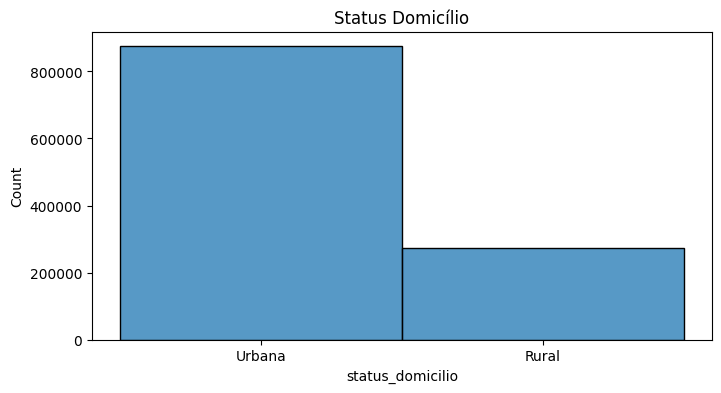

In [13]:
# histograma de status_domicilio
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(id_df, x='status_domicilio', kde=False, ax=ax)
plt.title('Status Domicílio')
plt.show()

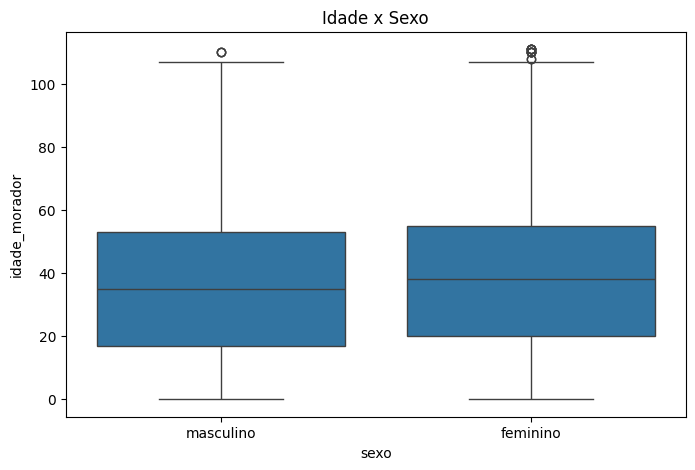

In [14]:
# idade x sexo
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=id_df, x='sexo', y='idade_morador', ax=ax)
plt.title('Idade x Sexo')
plt.show()

# Saúde

In [15]:
sintomas_df = pd.read_csv('output/sintomas_df.csv')

sintomas_df.head()

,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,dor_peito,nausea,nariz_entupido_coriza,fadiga,dor_olhos,perda_olfato_paladar,dor_muscular,diarreia
0,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
1,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
2,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
3,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
4,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [16]:
providencias_df = pd.read_csv('output/providencias_df.csv')

providencias_df.head()

,como_restringiu_contato_fisico,compareceu_estabelecimento_de_saude,ficou_em_casa,ligou_profissional_saude,automedicou,prescricao_medica,visita_profissional_saude_sus,visita_de_profissional_saude_particular,outra_providencia
0,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
1,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
2,Ficou rigorosamente em casa,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
3,Ficou rigorosamente em casa,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
4,"Reduziu o contato com as pessoas, mas continuo...",Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável


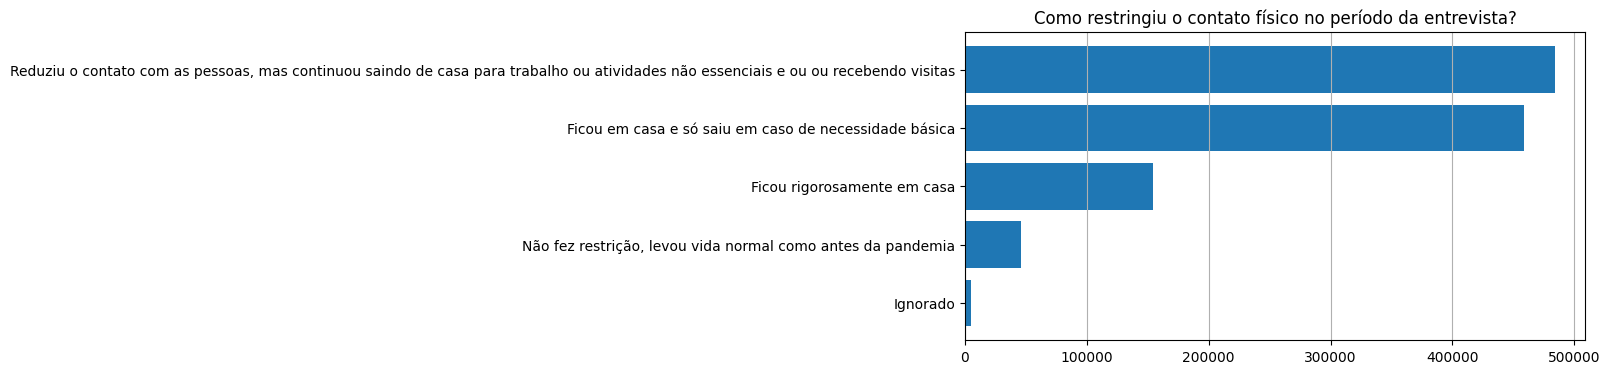

In [17]:
# group by como_restringiu_contato_fisico, count and plot
restringiu_df = providencias_df.groupby('como_restringiu_contato_fisico').size().reset_index(name='count')
restringiu_df = restringiu_df.sort_values(by='count')

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(restringiu_df['como_restringiu_contato_fisico'], restringiu_df['count'])
ax.set_title('Como restringiu o contato físico no período da entrevista?')
ax.grid(axis='x')
plt.show()

C:\Users\vinip\AppData\Local\Temp\ipykernel_8516\534086754.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


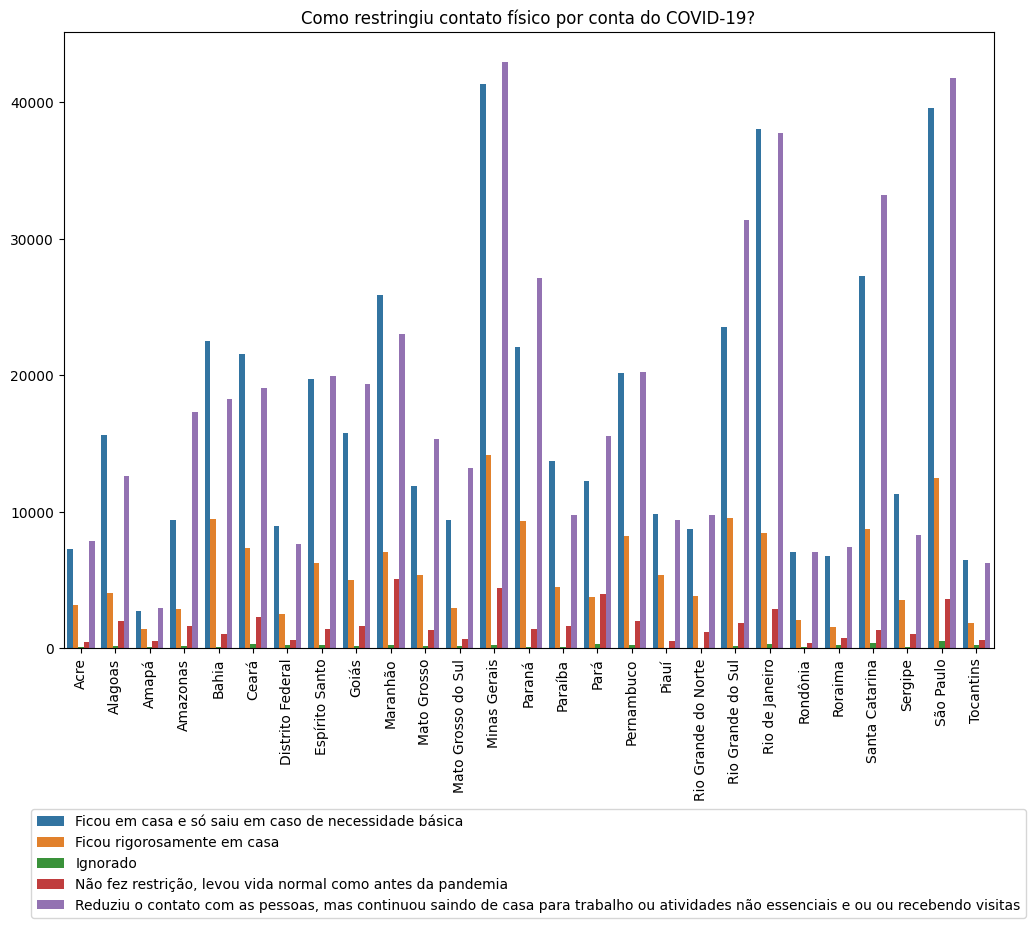

In [18]:
# group by uf, "como_restringiu_contato_fisico" value counts
restringiu_df = df.groupby(['uf', 'como_restringiu_contato_fisico']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=restringiu_df, x='uf', y='count', hue='como_restringiu_contato_fisico', ax=ax)
ax.set_title('Como restringiu contato físico por conta do COVID-19?')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

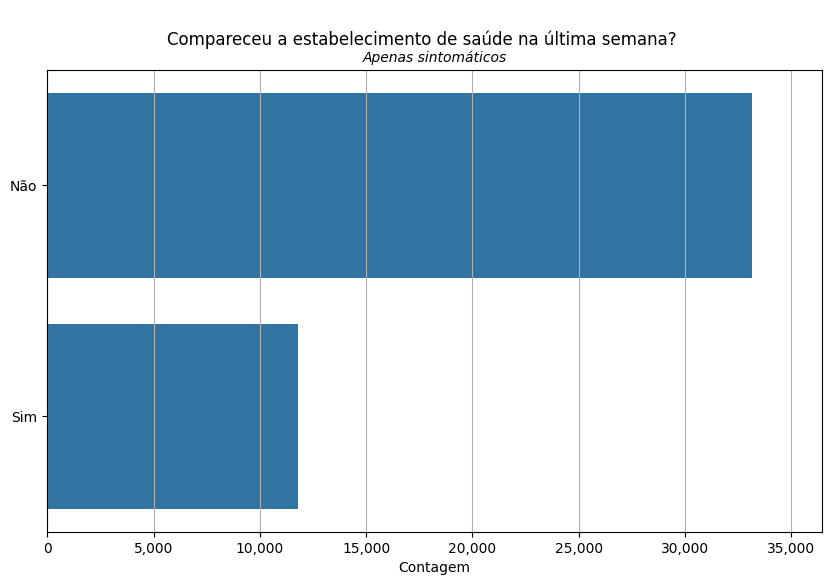

In [19]:
# group by compareceu_estabelecimento_de_saude, count and plot
compareceu_df = providencias_df.groupby('compareceu_estabelecimento_de_saude').size().reset_index(name='count')
compareceu_df = compareceu_df.sort_values(by='count', ascending=False)
# Remover Ignorado / Não aplicável
compareceu_df = compareceu_df[compareceu_df['compareceu_estabelecimento_de_saude'] != 'Ignorado / Não aplicável']

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=compareceu_df, x='count', y='compareceu_estabelecimento_de_saude', orient='h', ax=ax)
plt.suptitle('\nCompareceu a estabelecimento de saúde na última semana?')
ax.set_title('Apenas sintomáticos', style='italic', fontsize=10)
ax.grid(axis='x')
ax.set_xlim(0, compareceu_df['count'].max() * 1.1)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_ylabel('')
ax.set_xlabel('Contagem')
plt.show()

C:\Users\vinip\AppData\Local\Temp\ipykernel_8516\2228846021.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


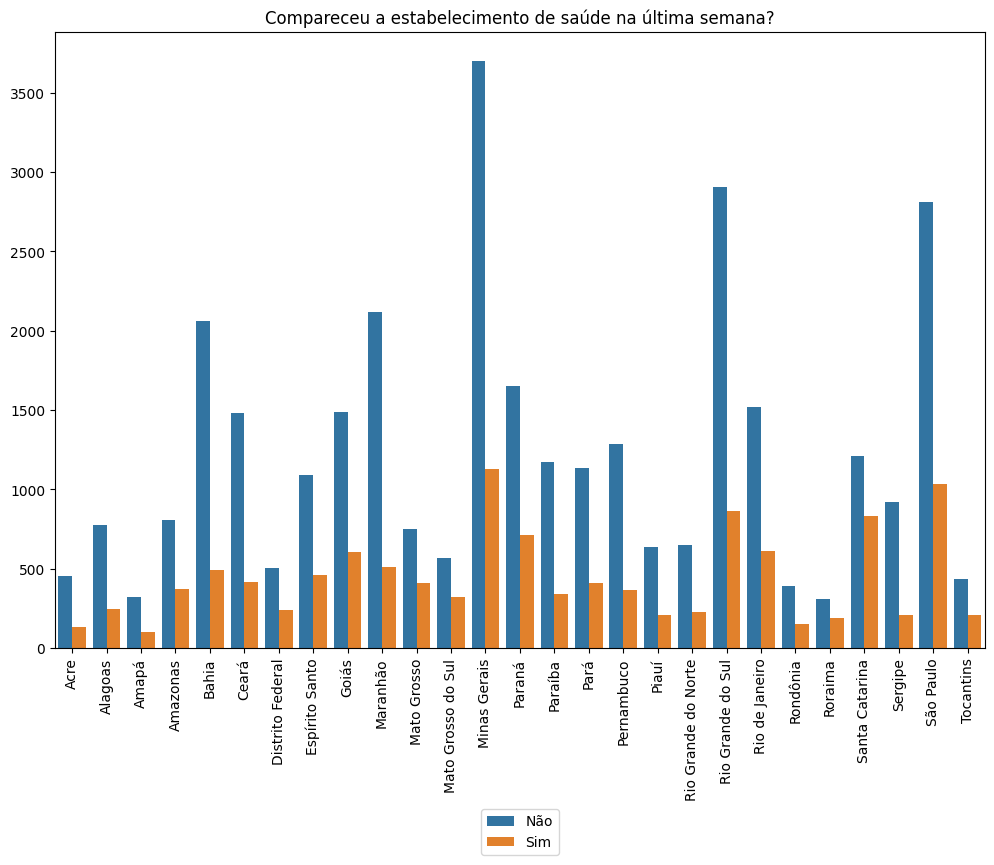

In [20]:
# group by uf, "como_restringiu_contato_fisico" value counts
compareceu_uf_df = df.groupby(['uf', 'compareceu_estabelecimento_de_saude']).size().reset_index(name='count')
# drop Não informado or Ignorado / Não aplicável
compareceu_uf_df = compareceu_uf_df[compareceu_uf_df['compareceu_estabelecimento_de_saude'] != 'Ignorado / Não aplicável']

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=compareceu_uf_df, x='uf', y='count', hue='compareceu_estabelecimento_de_saude', ax=ax)
ax.set_title('Compareceu a estabelecimento de saúde na última semana?')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

C:\Users\vinip\AppData\Local\Temp\ipykernel_8516\605185519.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  compareceu_uf_df = compareceu_uf_df.groupby('uf').apply(lambda x: x[x['compareceu_estabelecimento_de_saude'] == 'Sim']['count'].sum() / x['count'].sum() * 100)\
C:\Users\vinip\AppData\Local\Temp\ipykernel_8516\605185519.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


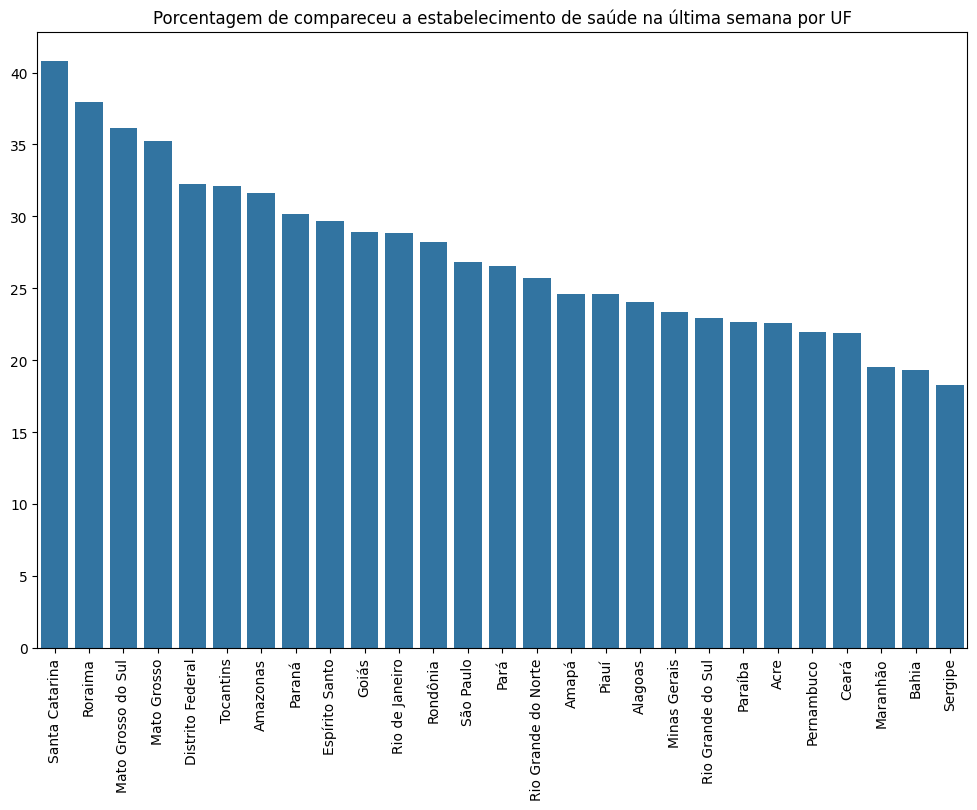

In [21]:
# % de compareceu_estabelecimento_de_saude por UF
compareceu_uf_df = compareceu_uf_df.groupby('uf').apply(lambda x: x[x['compareceu_estabelecimento_de_saude'] == 'Sim']['count'].sum() / x['count'].sum() * 100)\
                                                        .reset_index(name='percent').copy()
compareceu_uf_df = compareceu_uf_df.sort_values(by='percent', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=compareceu_uf_df, x='uf', y='percent', ax=ax)
ax.set_title('Porcentagem de compareceu a estabelecimento de saúde na última semana por UF')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

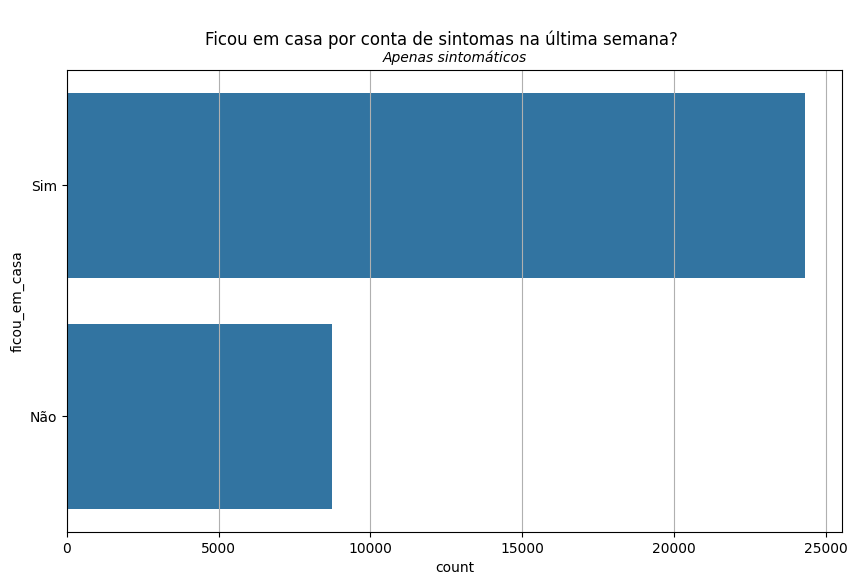

In [22]:
# ficou_em_casa
ficou_casa_df = providencias_df.groupby('ficou_em_casa').size().reset_index(name='count')
ficou_casa_df = ficou_casa_df.sort_values(by='count', ascending=False)
# drop Não informado or Ignorado / Não aplicável
ficou_casa_df = ficou_casa_df[(ficou_casa_df['ficou_em_casa'] != 'Não informado') & (ficou_casa_df['ficou_em_casa'] != 'Ignorado / Não aplicável')]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=ficou_casa_df, x='count', y='ficou_em_casa', orient='h', ax=ax)
plt.suptitle('\nFicou em casa por conta de sintomas na última semana?')
ax.set_title('Apenas sintomáticos', style='italic', fontsize=10)
ax.grid(axis='x')
plt.show()

C:\Users\vinip\AppData\Local\Temp\ipykernel_8516\3681133016.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


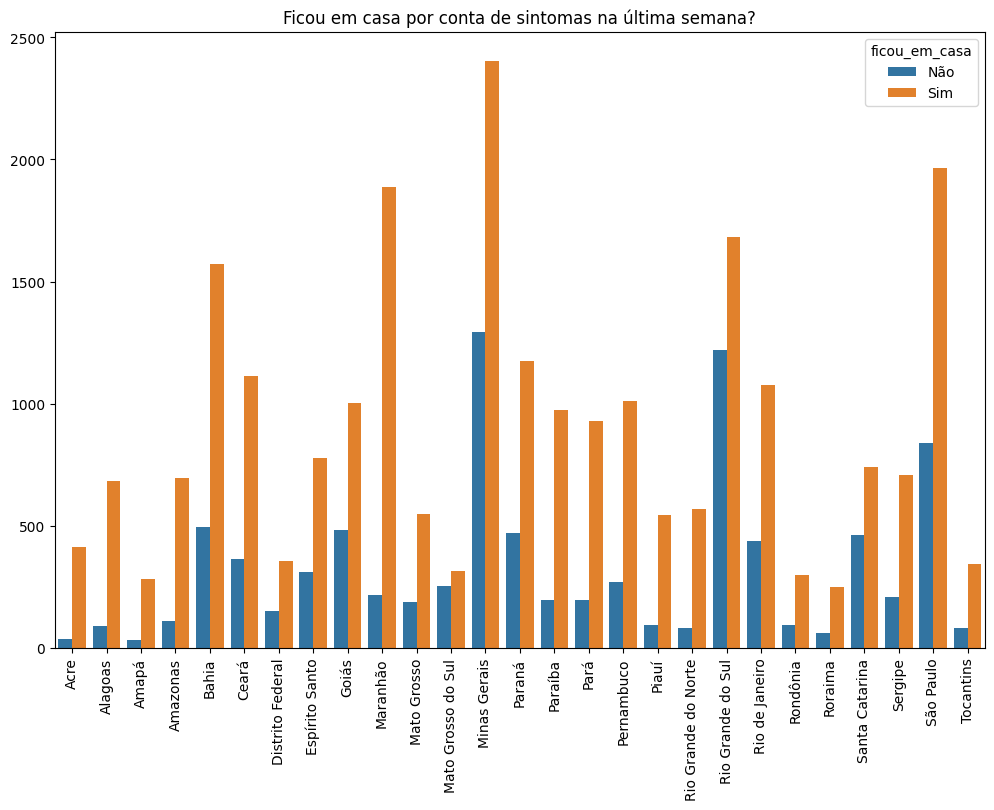

In [23]:
# group by df, ficou em casa
ficou_casa_uf_df = df.groupby(['uf', 'ficou_em_casa']).size().reset_index(name='count')
# drop Não informado or Ignorado / Não aplicável
ficou_casa_uf_df = ficou_casa_uf_df[(ficou_casa_uf_df['ficou_em_casa'] != 'Não informado') & (ficou_casa_uf_df['ficou_em_casa'] != 'Ignorado / Não aplicável')]

# plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=ficou_casa_uf_df, x='uf', y='count', hue='ficou_em_casa', ax=ax)
ax.set_title('Ficou em casa por conta de sintomas na última semana?')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

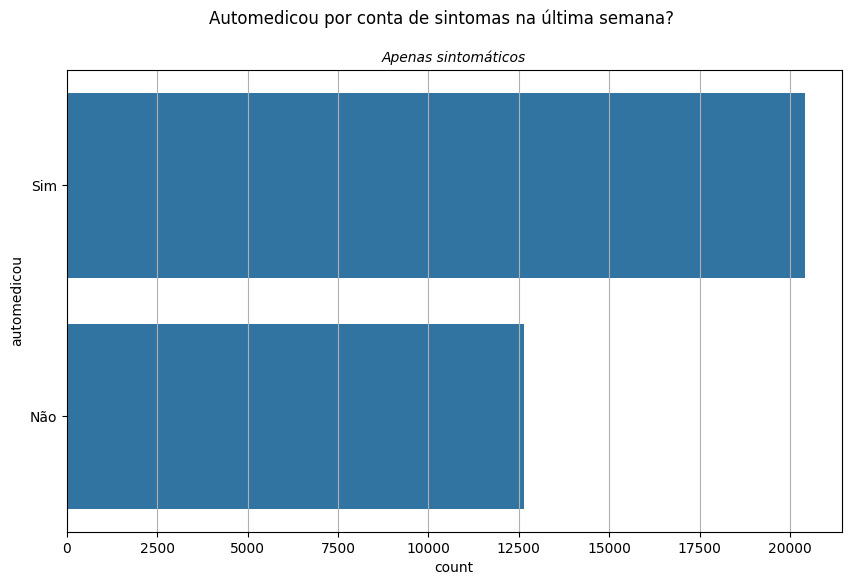

In [24]:
# automedicou
automedicou_df = providencias_df.groupby('automedicou').size().reset_index(name='count')
automedicou_df = automedicou_df.sort_values(by='count', ascending=False)
# drop Não informado or Ignorado / Não aplicável
automedicou_df = automedicou_df[(automedicou_df['automedicou'] != 'Não informado') & (automedicou_df['automedicou'] != 'Ignorado / Não aplicável')]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=automedicou_df, x='count', y='automedicou', orient='h', ax=ax)
plt.suptitle('Automedicou por conta de sintomas na última semana?')
# apenas sintomáticos
ax.set_title('Apenas sintomáticos', style='italic', fontsize=10)
ax.grid(axis='x')
plt.show()

In [25]:
testagem_df = pd.read_csv('output/testagem_df.csv')

testagem_df.head()

,realizou_teste_coronavirus,cotonete,resultado_cotonete,coleta_sangue_dedo,resultado_sangue_dedo,coleta_sanque_braco,resultado_sangue_braco
0,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
1,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
2,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
3,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável
4,Não,Ignorado,Ignorado / Não aplicável,Ignorado,Ignorado / Não aplicável,Ignorado / Não aplicável,Ignorado / Não aplicável


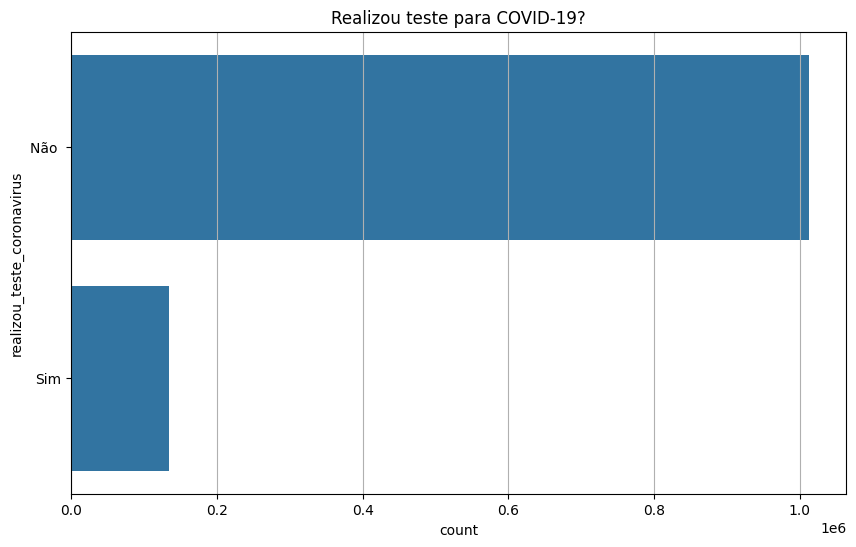

Quantidade de respostas Sim+Não: 1146784
Porcentagem de respostas Sim/Total: 11.62%


In [26]:
# check realizou_teste_coronavirus
realizou_teste_df = testagem_df.groupby('realizou_teste_coronavirus').size().reset_index(name='count')
realizou_teste_df = realizou_teste_df.sort_values(by='count', ascending=False)
# drop Ignorado
realizou_teste_df = realizou_teste_df[realizou_teste_df['realizou_teste_coronavirus'] != 'Ignorado']

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=realizou_teste_df, x='count', y='realizou_teste_coronavirus', orient='h', ax=ax)
ax.set_title('Realizou teste para COVID-19?')
ax.grid(axis='x')
plt.show()

# print Sim, Não, Sim/Sim+Não
print(f'Quantidade de respostas Sim+Não: {realizou_teste_df["count"].sum()}')
print(f'Porcentagem de respostas Sim/Total: {realizou_teste_df[realizou_teste_df["realizou_teste_coronavirus"] == "Sim"]["count"].sum() / testagem_df.shape[0] * 100:.2f}%')

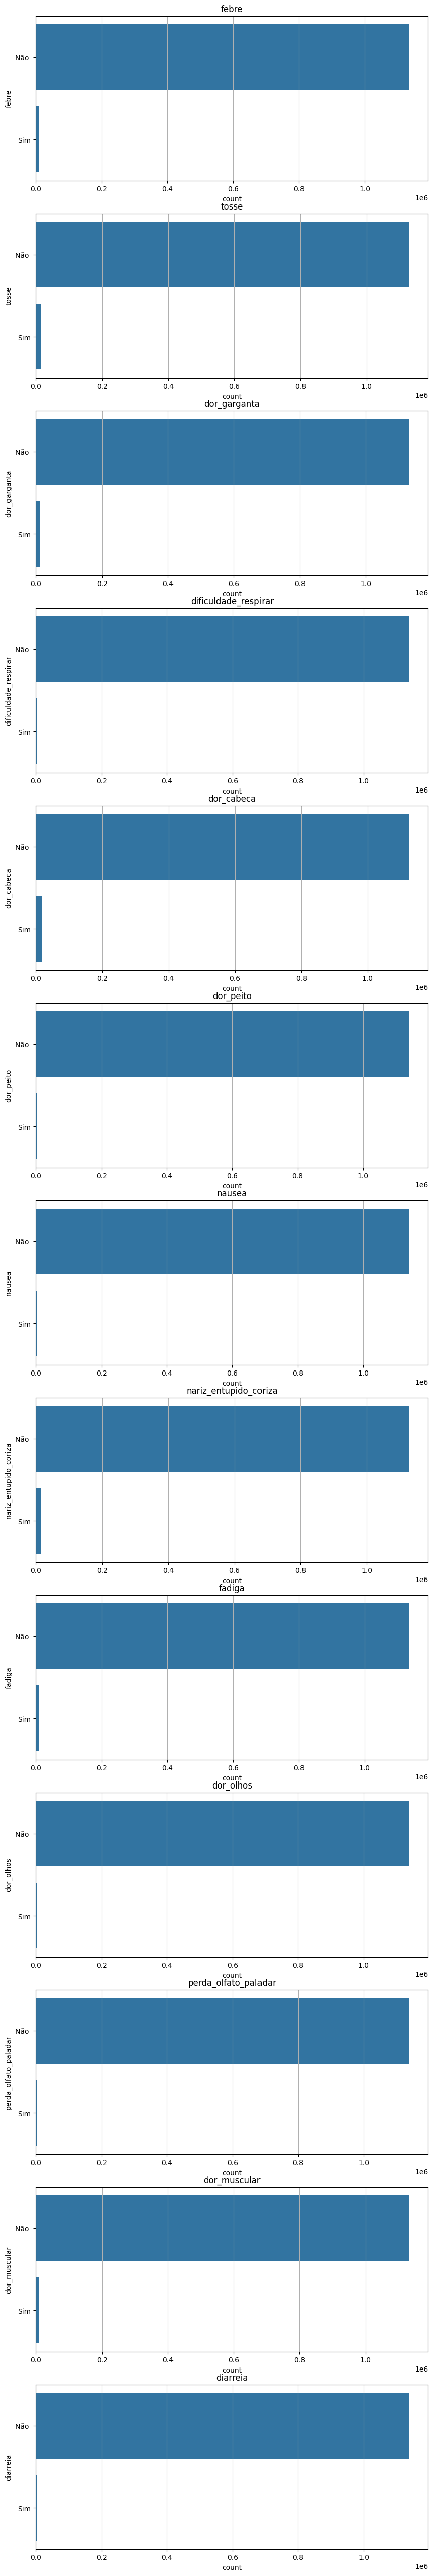

In [27]:
# plot all columns in sintomas_df value counts in one figure
n_charts = len(sintomas_df.columns)

fig, ax = plt.subplots(n_charts, 1, figsize=(10, 5 * n_charts))
for i, col in enumerate(sintomas_df.columns):
    # drop Não informado or Ignorado / Não aplicável for chart
    sintomas_chart_df = sintomas_df.groupby(col).size().reset_index(name='count')
    sintomas_chart_df = sintomas_chart_df[sintomas_chart_df[col] != 'Ignorado / Não sabe']
    sns.barplot(data=sintomas_chart_df, x='count', y=col, orient='h', ax=ax[i])
    ax[i].set_title(f'{col}')
    ax[i].grid(axis='x')
plt.show()

In [28]:
# for col in sintomas_df, calculate % of sim removing Não sabe / Ignorado
for col in sintomas_df.columns:
    sintomas_chart_df = sintomas_df.groupby(col).size().reset_index(name='count')
    sintomas_chart_df = sintomas_chart_df[sintomas_chart_df[col] != 'Ignorado / Não sabe']
    print(f'{col}: {sintomas_chart_df[sintomas_chart_df[col] == "Sim"]["count"].sum() / sintomas_chart_df["count"].sum() * 100:.2f}%')

febre: 0.79%
tosse: 1.34%
dor_garganta: 1.10%
dificuldade_respirar: 0.42%
dor_cabeca: 1.66%
dor_peito: 0.30%
nausea: 0.35%
nariz_entupido_coriza: 1.41%
fadiga: 0.72%
dor_olhos: 0.32%
perda_olfato_paladar: 0.39%
dor_muscular: 0.95%
diarreia: 0.38%


In [29]:
sintomas_percents = pd.DataFrame()

# plot sintomas percent sorted
for col in sintomas_df.columns:
    sintomas_chart_df = sintomas_df.groupby(col).size().reset_index(name='count')
    sintomas_chart_df = sintomas_chart_df[sintomas_chart_df[col] != 'Ignorado / Não sabe']
    sintomas_chart_df['percent'] = (sintomas_chart_df['count'] / sintomas_chart_df['count'].sum() * 100).round(2)
    sintomas_chart_df = sintomas_chart_df.sort_values(by='percent', ascending=False)
    sintomas_chart_df = sintomas_chart_df.drop(columns='count')
    sintomas_percents[col] = sintomas_chart_df.set_index(col).to_dict()['percent']
    sintomas_percents = sintomas_percents.T

sintomas_percents = sintomas_percents.sort_values(by='Sim', ascending=False)[['Sim']]
sintomas_percents = sintomas_percents.reset_index().rename(columns={'index': 'sintomas'})

sintomas_percents

,sintomas,Sim
0,dor_cabeca,1.66
1,dor_garganta,1.10
2,febre,0.79
3,fadiga,0.72
4,perda_olfato_paladar,0.39
5,diarreia,0.38
6,nausea,0.35


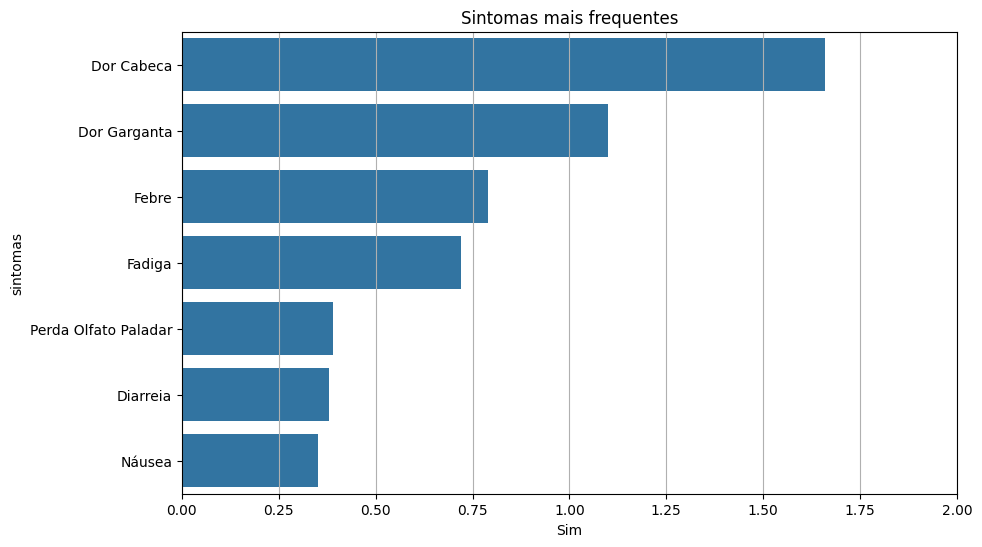

In [30]:
sintomas_percents['sintomas'] = sintomas_percents['sintomas'].str.replace('_', ' ')
sintomas_percents['sintomas'] = sintomas_percents['sintomas'].str.replace('nausea', 'náusea')
sintomas_percents['sintomas'] = sintomas_percents['sintomas'].str.title()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=sintomas_percents, x='Sim', y='sintomas', orient='h', ax=ax)
ax.set_title('Sintomas mais frequentes')
ax.set_xlim(0, 2)
ax.grid(axis='x')
plt.show()

In [31]:
itens_higiene_df = pd.read_csv('output/itens_higiene_df.csv')

itens_higiene_df.head()

,domicilio_tem_sabao_detergente,domicilio_tem_alcool_70mais,domicilio_tem_mascaras,domicilio_tem_luvas_descartaveis,domicilio_tem_agua_sanitaria_desinfetante
0,Sim,Sim,Sim,Não,Sim
1,Sim,Sim,Sim,Não,Sim
2,Sim,Sim,Sim,Não,Sim
3,Sim,Sim,Sim,Não,Sim
4,Sim,Sim,Sim,Não,Sim


In [33]:
itens_saude_df = pd.DataFrame()

# group by each column, count 'Sim' and 'Não'
for col in itens_higiene_df.columns:
    itens_higiene_chart_df = itens_higiene_df.groupby(col).size().reset_index(name='count')
    # transpose
    itens_higiene_chart_df = itens_higiene_chart_df.T
    # rename columns
    itens_higiene_chart_df.columns = itens_higiene_chart_df.iloc[0]
    # reset index
    itens_higiene_chart_df = itens_higiene_chart_df.reset_index()
    # rename to item
    itens_higiene_chart_df = itens_higiene_chart_df.rename(columns={'index': 'item'})
    # drop first row
    itens_higiene_chart_df = itens_higiene_chart_df.drop(index=0)
    # concat with itens_saude_df
    itens_saude_df = pd.concat([itens_saude_df, itens_higiene_chart_df])

itens_saude_df

,item,Não,Não sabe,Sim
1,count,3529,291,1145377
1,count,41264,1133,1106800
1,count,5240,274,1143683
1,count,711631,4836,432730
1,count,13749,1103,1134345
